In [1]:
'''
Natural Language Processing: 
    Part 1: Data
    Part 2: Basic Exploratory Data Analysis
    Part 3: Text Pre-Processing
    Part 4: Vectorization
    Part 6: Model Evaluation
    Part 7: Creating a Data Pipeline
'''
#!conda install nltk
import nltk # Imports the library
#nltk.download() #Download the necessary datasets   //my computer already has it downloaded


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
# iterating through the first 10 messages...
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import numpy as np
import pandas as pd

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['labels', 'message'])

In [6]:
print(messages.head())

  labels                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


# Explortory data analysis

In [7]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [9]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len) # notice no prentesis behind len() when passing function as an object
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

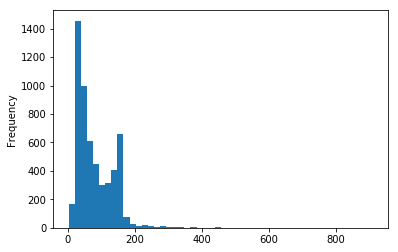

In [12]:
messages['length'].plot(bins = 50, kind = 'hist')

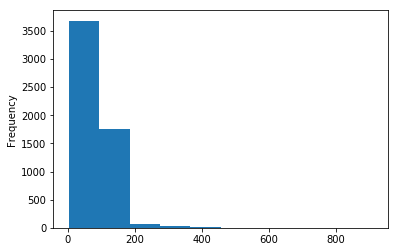

In [14]:
messages['length'].plot(bins = 10, kind = 'hist')

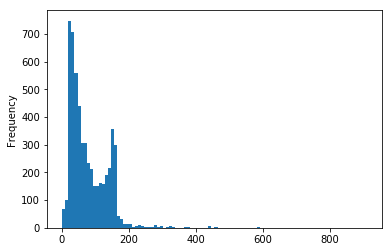

In [14]:
messages['length'].plot(bins = 100, kind = 'hist')

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

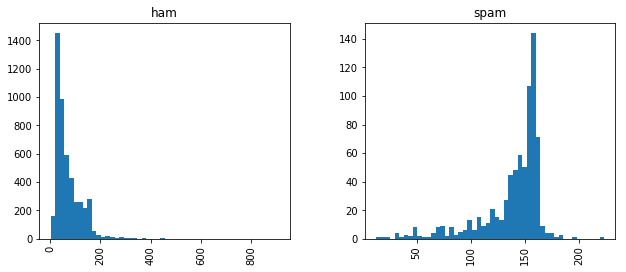

In [17]:
messages.hist(column='length', by = 'labels', bins = 50, figsize = (10,4))
xlabel = 'text length'
ylabel = 'occurance num'

# preprocessing the data Lesson 89:  turn them into useful vectors.

In [18]:
# I think this way is dated but I will try this also: 
import string

mess = 'This is some sample of sentences that I can use, such that it has punctuation, and other meaningful text to use for my purpses.'
print(mess)

This is some sample of sentences that I can use, such that it has punctuation, and other meaningful text to use for my purpses.


In [19]:
nonpunc = [char for char in mess if char not in string.punctuation]
print(nonpunc)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 's', 'o', 'm', 'e', ' ', 's', 'a', 'm', 'p', 'l', 'e', ' ', 'o', 'f', ' ', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', 's', ' ', 't', 'h', 'a', 't', ' ', 'I', ' ', 'c', 'a', 'n', ' ', 'u', 's', 'e', ' ', 's', 'u', 'c', 'h', ' ', 't', 'h', 'a', 't', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'm', 'e', 'a', 'n', 'i', 'n', 'g', 'f', 'u', 'l', ' ', 't', 'e', 'x', 't', ' ', 't', 'o', ' ', 'u', 's', 'e', ' ', 'f', 'o', 'r', ' ', 'm', 'y', ' ', 'p', 'u', 'r', 'p', 's', 'e', 's']


In [20]:
nonpunc=''.join(nonpunc)

In [21]:
print(nonpunc)

This is some sample of sentences that I can use such that it has punctuation and other meaningful text to use for my purpses


In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [24]:
print(nonpunc.split())

['This', 'is', 'some', 'sample', 'of', 'sentences', 'that', 'I', 'can', 'use', 'such', 'that', 'it', 'has', 'punctuation', 'and', 'other', 'meaningful', 'text', 'to', 'use', 'for', 'my', 'purpses']


In [25]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [26]:
print(clean_mess)

['sample', 'sentences', 'use', 'punctuation', 'meaningful', 'text', 'use', 'purpses']


In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Normalization to vectorization

In [29]:
'''
What we are doing: 
Now we'll convert each message, represented as a list of tokens (lemmas) above, 
into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

    1. Count how many times does a word occur in each message (Known as TERM FREQUENCY)  => CountVectorizer()

    2. Weigh the counts, so that frequent tokens get LOWER weight (inverse document frequency)

    Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
'''

from sklearn.feature_extraction.text import CountVectorizer



In [30]:
bow_transformer = CountVectorizer(analyzer = text_process)    # text_process() is the function to do all the pre-process

In [31]:
bow_transformer.fit(messages['message'])     # fit the message to the model

CountVectorizer(analyzer=<function text_process at 0x0DA391E0>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)

In [33]:
message4 = messages['message'][3]

In [34]:
message4


'U dun say so early hor... U c already then say...'

In [35]:
bow4 =bow_transformer.transform([message4])

In [36]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [37]:
bow_transformer.get_feature_names()[9554]

'say'

In [38]:
message_bow = bow_transformer.transform(messages['message'])

In [41]:
print(message_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [42]:
print('Shape of Sparse Matrix: ', message_bow.shape)
print('Amount of Non-Zero occurences: ', message_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [43]:
# Term frequency is how often the term occurs in the document. 
# However, the longer the document the more likelihood of some 'term' occuring. 
# Hence, you use (term frequency/document length) to get TF  (Term frequency)

In [44]:
# But some of the 'stop words' are irrelevant w respect to semantics of the writing. 
# TF-idf:   divide the doc vs the document length and multiply by the TF. 
# TF-idf is a weight system or ratio and does not reflect sort of an intuitive value. 
'''
he tf-idf weight is a weight often used in information retrieval and text mining. 
This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. 
The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 
Variations of the tf-idf weighting scheme are often used by search engines 
as a central tool in scoring and ranking a document's relevance given a user query.



'''

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(message_bow)

In [ ]:
'''
Typically, the tf-idf weight is composed by two terms: 
the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, 
divided by the total number of words in that document; 
the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number 
of the documents in the corpus divided by the number of documents where the specific term appears.
'''

In [57]:
print('printing bow4: ')
print(bow4)
print('transforming bow4...to tifdf4')
tfidf4 = tfidf_transformer.transform(bow4)
print('TF-idf is a weight system or ratio and does not reflect sort of an intuitive value.' )
print(tfidf4)
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

printing bow4: 
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
transforming bow4...to tifdf4
TF-idf is a weight system or ratio and does not reflect sort of an intuitive value.
  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067
3.2800524267409408


In [58]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [59]:
print("This is now vectorized!")
'''
vectorization speeds up the code quickly in big data: 
get rid of for loop in looping through W and x in Z = W(transpose)x +b 
by using numpy to transpose w first and computing directly.

'''
print(messages_tfidf.shape)


This is now vectorized!
(5572, 11425)


# Now creating a model  (using naive_bayes)

In [60]:
#importing naive bayes model to fit()

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])


In [62]:
print("Predicted: ", spam_detect_model.predict(tfidf4)[0])

Predicted:  ham


In [63]:
print("Expected: ", messages['labels'][3])

Expected:  ham


In [66]:
print(messages['labels'])

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object


# Model Evaluation

In [67]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [69]:
# build classification report using scikit-learn


from sklearn.metrics import classification_report
print(classification_report(messages['labels'], all_predictions))



              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages[message],messages[labels], test_size = 0.2)

In [73]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['labels'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))


4457 1115 5572


# Creating a data pipeline

In [75]:
'''
dLet's run our model again and then predict off the test set. 
We will use SciKit Learn's pipeline capabilities to store a pipline of workflow. 
This will allow us to set up all 
the transformations that we will do to the data for future use. 
Let's see an example of how it works:
'''

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))



              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1006
        spam       0.73      1.00      0.84       109

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115

